In [1]:
# Import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from IPython.display import display, Markdown

plt.style.use("ggplot")
sns.set()

In [2]:
import matplotlib.image as mpimg
from PIL import Image


def show(path):
    img = mpimg.imread(path)
    sns.reset_orig()
    plt.figure(figsize=(8, 8))
    plt.axis("off")
    plt.imshow(img)
    sns.set()

# Minimize the loss

In [30]:
# from scipy.optimize import minimize

# # Pass the function to minimize and initial guess of size np
# def fun(list_num):
#     s = 0
#     for i in list_num:
#         s = s + (i - 5)**2
#     return s

# a = np.array(range(10))
# minimize(fun, a).x

# 0-1 Loss Diagram
$\frac{1}{m}\sum_{i=1}^{m}\left(y_i-\hat{y_i}\right)^2$
- First guess at what error should be
- Difficult to optimize!

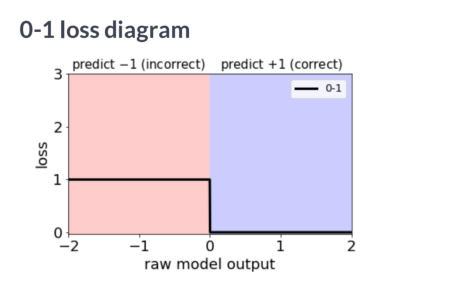

In [31]:
show(r'images/0_1lossDiagram.png')

# Logistic loss diagram
- $\frac{1}{m}\sum_{i=1}^{m}-y_i\log\left(\hat{y_i}\right)+\left(1-y_i\right)\log\left({1-\hat{y_i}}\right)$

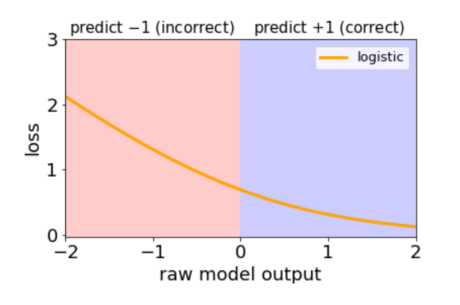

In [32]:
show(r'images/logistic_regression_lossDiagram.png')

# Logistic Regression for binary classification
- Logistic regression outputs probabilities.
- If the probability 'p' is greater than 0.5:
    - The data is labeled '1'
- If the probability 'p' is less than 0.5:
    - The data is labeled as '0'

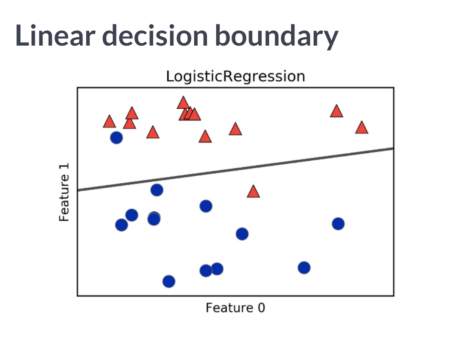

In [3]:
show(r'images/linear_decision_boundary.png')

## PIMA Indians dataset
- Here, we will work with the PIMA Indians dataset obtained from the UCI Machine Learning Repository. 
- The goal is to predict whether or not a given female patient will contract diabetes based on features such as BMI, age, and number of pregnancies.
- Therefore, it is a binary classification problem. A target value of 0 indicates that the patient does not have diabetes, while a value of 1 indicates that the patient does have diabetes.

In [4]:
diabetes = pd.read_csv("./datasets/diabetes.csv")
display(diabetes.head())
X = diabetes.drop("Outcome", axis=1).values
Y = diabetes["Outcome"].values
print(X.shape)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


(768, 8)


Coefficients of the classifier are:[[ 0.22959214  0.9961822  -0.19893895 -0.07190008 -0.04462876  0.85408662
   0.1215957   0.39758729]]
Intercept of the classifier are:[-0.79292776]


## Confusion Matrix

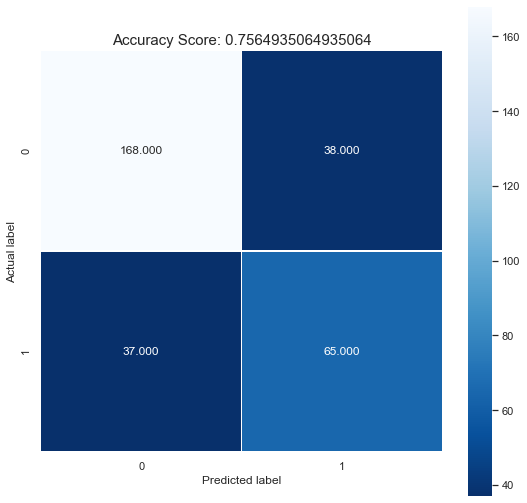

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Standardize features by removing the mean and scaling to unit variance
# The standard score of a sample x is calculated as:
# z = (x - u) / s
# where u is the mean of the training samples or zero if with_mean=False,
# and s is the standard deviation of the training samples or one if with_std=False.
# Centering and scaling happen independently on each feature by computing the relevant statistics
# on the samples in the training set. Mean and standard deviation are then stored to be used on later
# data using transform
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.4, random_state=42
)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)
print('Coefficients of the classifier are:{}\nIntercept of the classifier are:{}'.format(logreg.coef_,logreg.intercept_))

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
# High precision: Not many non-diabetes patients predicted to have diabetes
# High recall: Predicted most diabetes patients correctly
# print(classification_report(y_test, y_pred))

display(Markdown(rf"""## Confusion Matrix"""))

score = logreg.score(X_test, y_test)
plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=0.5, square=True, cmap="Blues_r")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
all_sample_title = "Accuracy Score: {0}".format(score)
plt.title(all_sample_title, size=15)

# Default threshold value is 0.5
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# print(logreg.score(X_test, y_test))
# print(np.sqrt(mean_squared_error(y_test, y_pred)))

# Receiver Operating Characteristic Curve
*A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The method was developed for operators of military radar receivers, which is why it is so named.*

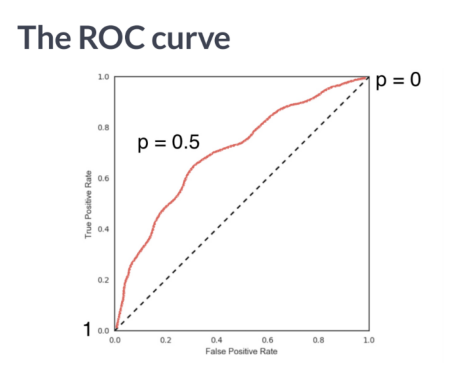

In [6]:
show(r'images/roc_curve.png')

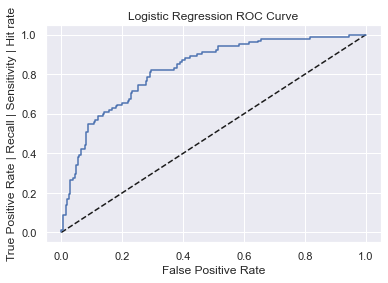

In [7]:
from sklearn.metrics import roc_curve

y_pred_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], "k--")

plt.plot(fpr, tpr, label="Logistic Regression")

# FNR=fp/(fp+tn)
# TPR=tp/(tp+fn)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate | Recall | Sensitivity | Hit rate")
plt.title("Logistic Regression ROC Curve")
plt.show()

## Area under the ROC Curve (AUC)

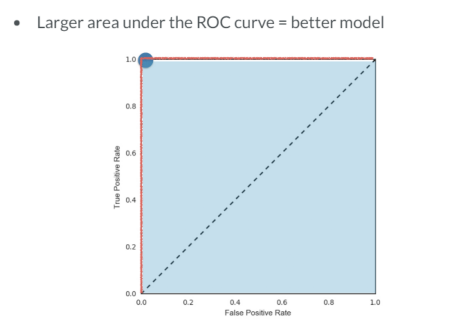

In [8]:
show(r'images/auc.png')

In [9]:
from sklearn.metrics import roc_auc_score

logreg = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.4, random_state=42
)

logreg.fit(X_train, y_train)

y_pred_prob = logreg.predict_proba(X_test)[:, 1]

print(roc_auc_score(y_test, y_pred_prob))

0.8251475347420522


In [10]:
# AUC using cross-validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(logreg, X, Y, cv=5, scoring="roc_auc")
print(cv_scores)

[0.81240741 0.80925926 0.82537037 0.87339623 0.84377358]


## Hyperparameter Tuning
- Logistic regression also has a regularization parameter: C.
- C controls the inverse of the regularization strength.
- A large C can lead to an overfit model, while a small C can lead to an underfit model.
- In addition to C, logistic regression has a 'penalty' hyperparameter which specifies whether to use 'l1' or 'l2' regularization. We will create a hold-out set, tune the 'C' and 'penalty' hyperparameters of a logistic regression classifier using GridSearchCV on the training set.

In [11]:
# Import necessary modules
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {"C": c_space, "penalty": ["l2"]}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.4, random_state=42
)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)


# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 0.05179474679231213, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7652173913043477


# Fitting multi-class logistic regression

In [5]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# from sklearn.linear_model import LogisticRegression

digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

In [6]:
# Fit one-vs-rest logistic regression classifier
lr_ovr = LogisticRegression()
lr_ovr.fit(X_train, y_train)

print("OVR training accuracy:", lr_ovr.score(X_train, y_train))
print("OVR test accuracy    :", lr_ovr.score(X_test, y_test))

# Fit softmax classifier
lr_mn = LogisticRegression(multi_class="multinomial", solver="lbfgs")
lr_mn.fit(X_train, y_train)

print("Softmax training accuracy:", lr_mn.score(X_train, y_train))
print("Softmax test accuracy    :", lr_mn.score(X_test, y_test))

c:\users\administrator\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


OVR training accuracy: 1.0
OVR test accuracy    : 0.9688888888888889
Softmax training accuracy: 1.0
Softmax test accuracy    : 0.9688888888888889


c:\users\administrator\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
